# Proyecto integrado

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [123]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Parte 1. Descripción de los Datos



### Diccionario de datos

**games_csv** cada fila corresponde a un video juego:

- `Name`: Nombre.
- `Platform`: Plataforma.
- `Year_of_Release`: Año de lanzamiento.
- `Genre`: Género.
- `NA_sales`: ventas en Norteamérica en millones de dólares estadounidenses.
- `EU_sales`: ventas en Europa en millones de dólares estadounidenses.
- `JP_sales`:ventas en Japón en millones de dólares estadounidenses.
- `Other_sales`: ventas en otros países en millones de dólares estadounidenses. 
- `Critic_Score`: máximo de 100. 
- `User_Score`: máximo de 10.
- `Rating`: (ESRB).
    - E (Everyone): Apropiado para todas las edades.
    - E10+ (Everyone 10 and older): Apropiado para mayores de 10 años.
    - T (Teen): Apropiado para mayores de 13 años. Puede contener violencia, temas sugestivos, humor grosero, sangre mínima, insinuaciones de contenido sexual y/o lenguaje fuerte.
    - M (Mature): Apropiado para mayores de 17 años. Puede contener violencia intensa, sangre y gore, contenido sexual y/o lenguaje fuerte.
    - AO (Adults Only): Solo para adultos mayores de 18 años. Puede contener contenido sexual explícito, violencia extrema y/o lenguaje muy fuerte.
    - EC (Early Childhood): Apropiado para niños pequeños. Diseñado para niños de 3 años en adelante y no contiene material que los padres encontrarían inapropiado.
    - K-A (Kids to Adults): Anteriormente utilizado, ahora reemplazado por la clasificación "E". Significaba que el juego era adecuado para niños y adultos.
    - RP (Rating Pending): Clasificación pendiente. Se utiliza cuando un juego aún no ha sido clasificado oficialmente por la ESRB.

In [124]:
#Leer conjunto de datos
df_games = pd.read_csv('games.csv')

In [125]:
#mostrar información del dataframe
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [126]:
display(df_games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Conclusiones:

- los encabezados deben estar en minúsculas;
- los valores de las columnas no están guardados en los valores que les corresponden;
- cuenta con valores ausentes.


## Parte 2. Preparar datos

Preparamos los datos para ser analizados.

In [127]:
#Cambiar nombres de columnas a minúsculas
df_games.columns

def nombres_a_minusculas(df):
    # Obtener los nombres de las columnas actuales
    columnas = df.columns
    
    # Crear una lista con los nombres de columnas en minúsculas
    columnas_minusculas = [columna.lower() for columna in columnas]
    
    # Asignar los nuevos nombres de columnas al DataFrame
    df.columns = columnas_minusculas
    
    return df

df_games= nombres_a_minusculas(df_games)

print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [128]:
#Verificar filas duplicadas
display(df_games.duplicated().sum())

#Aseguramos que todos los valores de fecha se puedan trabajar como datos numéricos e ignorámos los inválidos por NaN.
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors= 'coerce')

type_y= df_games['year_of_release'].dtype

#Imprimimos el tipo de dato para cada columna
print(F'La columna "year_of_release" contiene datos tipo: {type_y}')



0

La columna "year_of_release" contiene datos tipo: float64


In [129]:
#Corregir valores de 'user_score' a tipo float
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].astype('float')

df_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Revisión valores ausentes

In [130]:
#Valores nulos de 'name'
display(df_games[df_games['name'].isna()])

#Valores nulos de 'genre'
display(df_games[df_games['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [131]:
# Eliminar filas con valores NaN en la columna 'name' y 'rating' 
df_games = df_games.dropna(subset=['name'])

# Eliminar filas con valores NaN en la columna 'year_of_release'
df_games = df_games.dropna(subset= ['year_of_release'])

In [132]:
#Verificar cuantos valores NaN quedan por columna
100*df_games.isna().sum()/df_games.shape[0]

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

In [133]:
#Buscamos relación entre las tres columnas critic_score, user_score y rating.

#filtered_nan_cscore= df_games[df_games['critic_score'].isna()]

#filtered_nan_uscore = df_games[df_games['critic_score'].isna() & df_games['user_score'].isna()]

filtered_nan_scores_and_rating= df_games[df_games['critic_score'].isna() & df_games['user_score'].isna() & df_games['rating'].isna()]

display(filtered_nan_scores_and_rating)

100*filtered_nan_scores_and_rating.shape[0]/df_games.shape[0]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


40.014594989053755

In [134]:
#Añadir columna de 'total_sales' al dataframe.

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [135]:
#Comprobamos si tenemos valores duplicados en nombre de video juego
display(df_games['name'].value_counts())

#value_counts().sort_index()

name
Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: count, Length: 11426, dtype: int64

Conclusiones:

- Eliminamos las filas que contienen valores nulos en la columna "year_of_release" ya que representan el 2% de los datos, por lo que no es una cantidad significativa.
- Eliminamos las filas que contienen valores nulos en la columna "name" y "genre" ya que sólo cuenta con 2 juegos, por lo que no es una cantidad significativa.
- Las columnas critic_score, user_score, rating cuentan con muchos valores NaN por lo que no podemos eliminarlas, debemos averiguar si tienen alguna relación.
- Tenemos 6580 filas con valores ausentes en las columnas 'critic_score', 'user_score' y 'rating' y corresponde al 40% de los datos.
- Contamos con valores duplicados en la columna 'name'.
- Mentendremos los valores NaN ya que la proporción de los valores ausentes es bastante grande para evitar alterar la distribución.
- Cambiamos los valores "TBD" a NaN en la columna "user_score".


## Parte 3. Analiza los datos

- ¿Cuántos juegos fueron lanzados por año? ¿son significativos los datos de cada periodo?
- ¿Cómo varían las ventas de una plataforma a otra? Elegir plataformas con mayores ventas totales y construye una distribución basada en los datos de cada año. ¿Existen plataformas que solían ser populares y que ahora ya no tienen ventas? ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


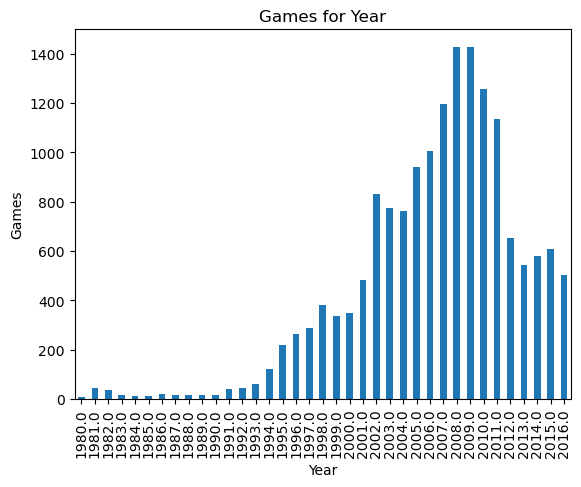

In [136]:
#Juegos lanzados por año
games_for_year= df_games.groupby('year_of_release')['name'].size().reset_index()
#display(games_for_year.sort_index())

#Gráfico de dispersión de juegos creados por año
games_for_year.plot(x='year_of_release',
        kind='bar',
        title='Games for Year',
        xlabel='Year',
        ylabel='Games',
        legend=False)

plt.show()


Observaciones genrerales:

Podemos ver que entre el 2005 y el 2010 hubo un aumento exponencial en la cantidad de juegos lanzados por año, siendo 2008 y 2009 los años con mayor lanzamiento de juegos con un total alrededor de los 1400 juegos.
Los siguientes años reduce la cantidad a la mitad y se mantiene entre los 600 y 400 juegos por año.

In [137]:
#Ventas por plataforma
console_sales = df_games.groupby('platform')['total_sales'].sum().reset_index()

top_console_sales = console_sales.sort_values(by= 'total_sales', ascending=False).head(10)

# Lista de las 10 plataformas principales
platforms_list = top_console_sales['platform'].tolist()

display(top_console_sales)
display(platforms_list)


DS = df_games[df_games['platform'] == 'DS'].count()
#DS1 = df_games[(df_games['platform'] == 'DS') & (df_games['year_of_release'] > 2000)].count()

DS2 = df_games[(df_games['platform'] == 'DS') & (df_games['year_of_release'] < 2000)]

#Eliminamos el juego DS que fue creado en 1985 ya que es el único y para evitar problemas al viasualizar la gráfica

df_games = df_games.drop(df_games[(df_games['platform'] == 'DS') & (df_games['year_of_release'] < 2000)].index)

display(DS2)





,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [138]:
#Seleccionamos los datos de las filas donde estén presentes las plataformas de nuestra lista
games_2 = df_games[df_games['platform'].isin(platforms_list)]

plarform_distrubution = games_2.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

plarform_distrubution

,year_of_release,platform,total_sales
0,1994.0,PS,6.03
1,1995.0,PS,35.96
2,1996.0,PS,94.70
3,1997.0,PS,136.17
4,1998.0,PS,169.49
...,...,...,...
91,2016.0,3DS,15.14
92,2016.0,PS3,3.60
93,2016.0,PS4,69.25
94,2016.0,Wii,0.18


c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

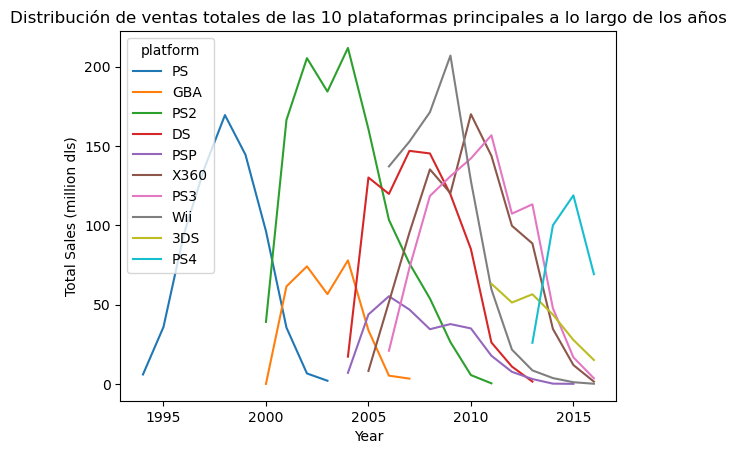

In [139]:
sns.lineplot(data=plarform_distrubution, 
             x='year_of_release',
             y='total_sales',
             hue='platform')

plt.xlabel('Year')
plt.ylabel('Total Sales (million dls)')
plt.title('Distribución de ventas totales de las 10 plataformas principales a lo largo de los años')

plt.show()

Observaciones generales:

- Las consolas tienen un ciclo de vida donde las consolas aumentan los primeros años y desciende luego de un periodo máximo de 5 años.
- La plataforma DS tiene un outlier que corresponde a un sólo juego que fue creado al rededor de 1985, decidí eliminarlo, ya que la plataforma DS fue lanzada en el 2004 y es probable que los datos registrados para ESE juego sean incorrectos.
- Los años con mayores ventas (2005-2011) coincide con los años de lanzamiento de nuevas plataformas como DS, Wii, X360 Y PS3 que es el siguiente del PS2.
- También podemos observar que entre las 10 consolas que más ventas han generado, se encuentran las 4 versiones de PS.

Text(0.5, 0, 'Platform')

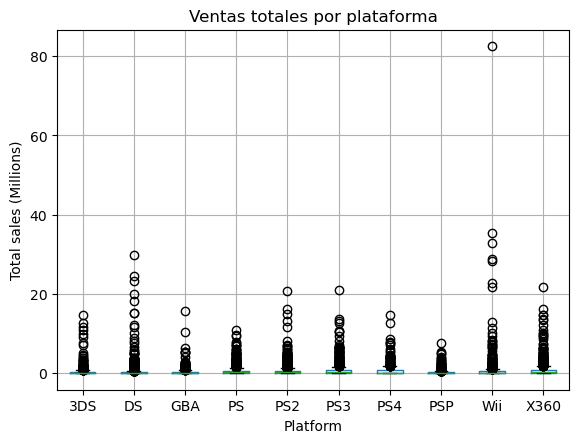

In [140]:
games_2.boxplot(column= 'total_sales', by= 'platform')

plt.title('Ventas totales por plataforma')
plt.suptitle('')
plt.ylabel('Total sales (Millions)')
plt.xlabel('Platform')

Text(0.5, 0, 'Platform')

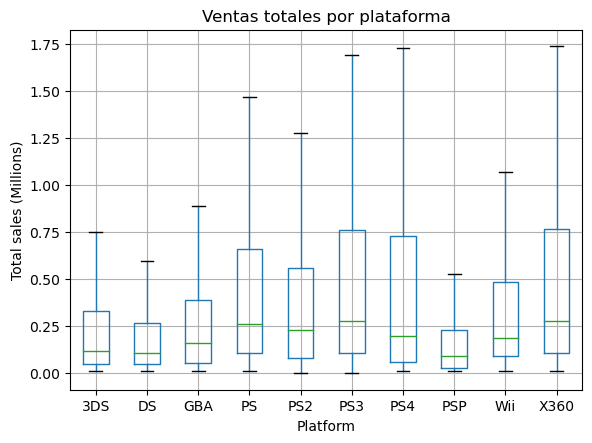

In [141]:
games_2.boxplot(column= 'total_sales', by= 'platform',  showfliers= False)

plt.title('Ventas totales por plataforma')
plt.suptitle('')
plt.ylabel('Total sales (Millions)')
plt.xlabel('Platform')

In [142]:
#Observamos cuales son los juegos más vendidos de las 10 consolas con mayores ventas
best_games = games_2[(games_2['total_sales'] > 10 ) & (games_2['year_of_release'] >= 2004)].sort_values(by='total_sales', ascending= False)

display(best_games.head(10))

#Obtenemos la media de las ventas totales
mean_ts_platforms = games_2['total_sales'].mean()
mean_ts_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


0.5523888569315474

Observaciones generales:

Gráfica de caja:
- La consola Wii tiene un valor atípico de hasta 80 millones por lo que no permite visualizar bien la primera gráfica de caja sin descartar los valores atípicos.
- Cada consola tuvo por lo menos un juego que fue un gran éxito por encima del promedio por lo que obtenemos una asimatría positiva, es decir que la media es mucho mayor a la mediana.
- La media de la venta total por consola es de 0.55 millones y la mediana ronda entre 0.10 y 0.25 millones, lo que significa que tenemos sesgo a la derecha.
- Wii tiene el juego que más ventas ha generado, este fue Wii Sports y y es categoría E.


0.17790728577594936

0.1128312136077378

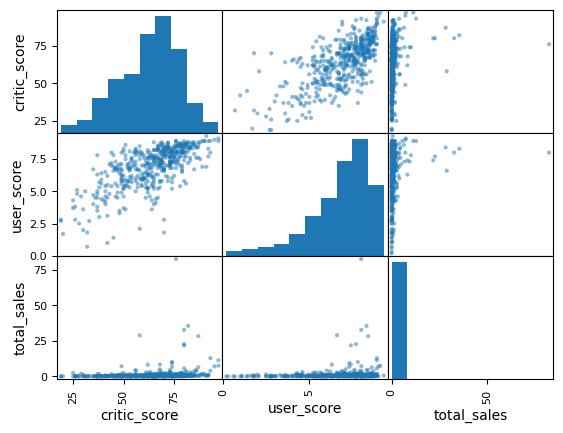

In [143]:
#Correlación entre las reseñas y las ventas totales de Wii

wii= games_2[games_2['platform'] == 'Wii']

#correlación critic score con ventas totales
corr_cs_wii= wii['critic_score'].corr(wii['total_sales'])
#correlación user score con ventas totales
corr_us_wii= wii['user_score'].corr(wii['total_sales']) 

display(corr_cs_wii)
display(corr_us_wii)

correlation_data = wii[['critic_score', 'user_score','total_sales']]

# Crear el gráfico de dispersión
pd.plotting.scatter_matrix(correlation_data)
plt.show()


In [144]:
#Correlación entre las reseñas y las ventas totales de PS4

PS4 = games_2[games_2['platform'] == 'PS4']

#correlación critic score con ventas totales
corr_cs_ps4= wii['critic_score'].corr(wii['total_sales'])
#correlación user score con ventas totales
corr_us_ps4= wii['user_score'].corr(wii['total_sales'])

display(corr_cs_ps4)
display(corr_us_ps4)


0.17790728577594936

0.1128312136077378

Observaciones generales:

- No hay una correlación fuerte entre los scores y las ventas totales de la consola Wii.

In [145]:
#Agrupamos los juegos por plataforma
videogames = games_2.groupby('name')['platform'].count().reset_index()

#Filtramos los juegos que sean multiplataforma
mp_videogames = videogames[videogames['platform'] > 1]

#Creamos una lista con los nombres de los juegos multiplataforma
duplicated_games = mp_videogames['name'].tolist()

#Obtenemos un dataframe filtrado con la lista de juegos que son multiplataforma de la anterior tabla que filtra los juegos más vendidos que salieron después del 2004
mp_best_games= best_games[best_games['name'].isin(duplicated_games)]

#display(mp_best_games.groupby('name')['platform'].count().reset_index())

#Filtramos los juegos que salen repetidos
filtered_mp_best_games = mp_best_games[mp_best_games.groupby('name')['platform'].transform('count') > 1]

#display(filtered_mp_best_games)
display(filtered_mp_best_games.groupby('name')['platform'].count().reset_index())




,name,platform
0,Call of Duty: Black Ops,2
1,Call of Duty: Black Ops II,2
2,Call of Duty: Modern Warfare 2,2
3,Call of Duty: Modern Warfare 3,2
4,Grand Theft Auto IV,2
5,Grand Theft Auto V,3


c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

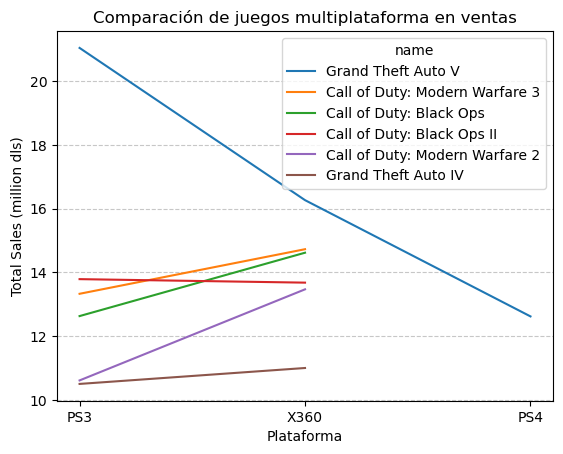

In [146]:
#Comparamos las ventas de los juegos multiplataforma

sns.lineplot(data=filtered_mp_best_games, 
             x='platform',
             y='total_sales',
             hue='name')

plt.xlabel('Plataforma')
plt.ylabel('Total Sales (million dls)')
plt.title('Comparación de juegos multiplataforma en ventas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Distribución general de los juegos por género

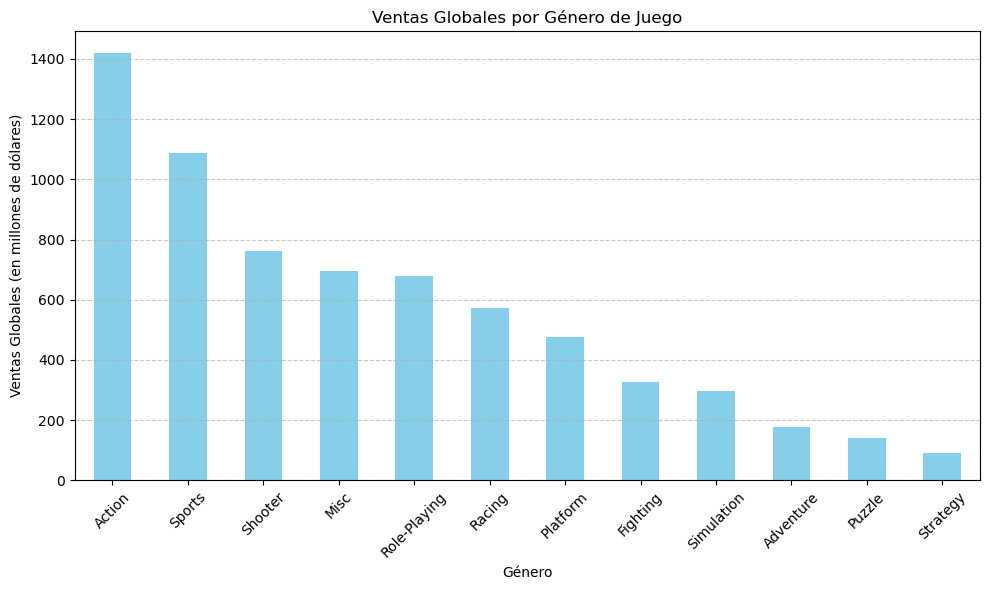

In [147]:
# Agrupar los datos por género y calcular las ventas globales totales para cada género

genre_sales = games_2.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas Globales por Género de Juego')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones de dólares)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



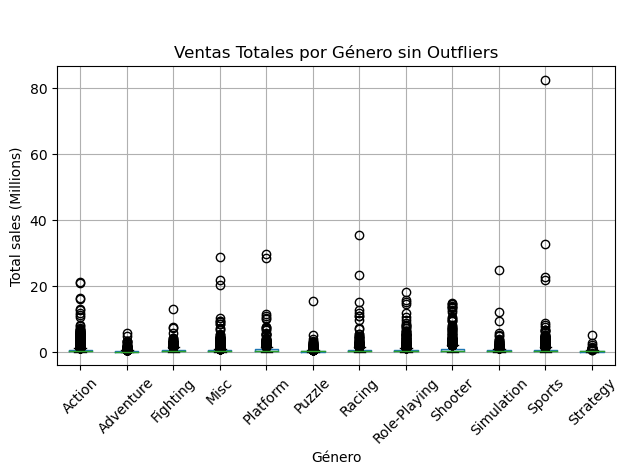

In [148]:
games_2.boxplot(column= 'total_sales', by= 'genre')

plt.title('Ventas Totales por Género sin Outfliers')
plt.suptitle(' ')
plt.ylabel('Total sales (Millions)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

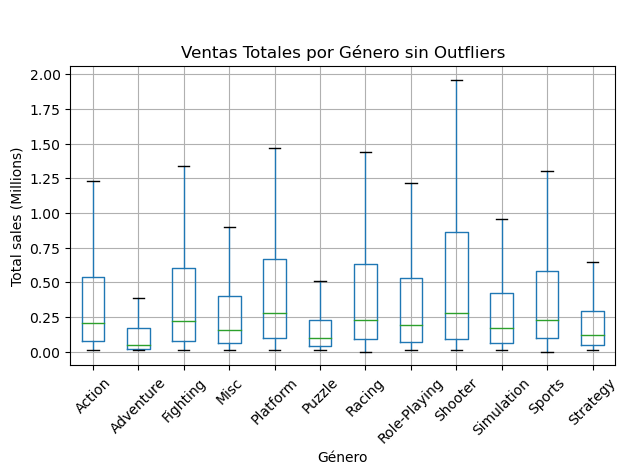

In [149]:
games_2.boxplot(column= 'total_sales', by= 'genre',  showfliers= False)

plt.title('Ventas Totales por Género sin Outfliers')
plt.suptitle(' ')
plt.ylabel('Total sales (Millions)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Conclusiones generales:

Por el gráfico de líneas podemos observar que los juegos de "Sports" y "Acción" son los dos géneros con mayores ventas. Sin embargo, como hemos visto en gráficas pasadas, existe mucho sesgo a la derecha por parte algunos juegos, por lo que si queremos saber el promedio de ventas por género, es mejor realizar un gráfico de cajas.

En el caso del gráfico de cajas, podemos observar que la mediana de las ventas de los juegos de Sports está por los 0.24 millones y el género con mayores ventas es el de Shooter, la mediana es de 0.26 y el 75% de sus ventas rondan por 0.80 millones con valores máximos de 2 millones.

## Paso 4. Crear un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [150]:
#Seleccionamos las 5 consolas más vendidas del dataframe original
five_platforms = top_console_sales.head()

#Creamos una lista con los nombres de las 5 plataformas
five_platforms_list = five_platforms['platform'].tolist()

#Creamos un dataframe filtrado con las 5 consolas más vendidas del dataframe original
df_top_platforms = df_games[df_games['platform'].isin(five_platforms_list)]

#Agrupamos las ventas de cada consola por región
market = df_top_platforms.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).reset_index()
market


,platform,na_sales,eu_sales,jp_sales
0,DS,380.31,188.41,175.00
1,PS2,572.92,332.63,137.54
2,PS3,390.13,327.21,79.41
3,Wii,486.87,258.32,68.28
4,X360,595.74,268.32,12.30


In [182]:
market_sales = pd.melt(market, id_vars= ['platform'], value_vars= ['na_sales', 'eu_sales', 'jp_sales'], var_name= 'market', value_name='sales')
market_sales

,platform,market,sales
0,DS,na_sales,380.31
1,PS2,na_sales,572.92
2,PS3,na_sales,390.13
3,Wii,na_sales,486.87
4,X360,na_sales,595.74
5,DS,eu_sales,188.41
6,PS2,eu_sales,332.63
7,PS3,eu_sales,327.21
8,Wii,eu_sales,258.32
9,X360,eu_sales,268.32


c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='market', ylabel='sales'>

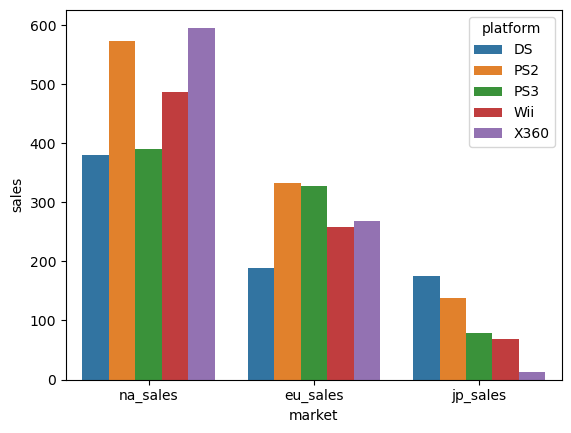

In [183]:
#Creamos un gráfico de barras para visualizar las ventas de las top 5 consolas por región
sns.barplot(market_sales, x='market', y='sales', hue='platform')

In [153]:
#Los 5 géneros más vendidos por región
grp_genre = df_top_platforms.groupby('genre').agg({'total_sales':'sum','na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).reset_index().sort_values(by='total_sales',ascending=False).head()
grp_genre

,genre,total_sales,na_sales,eu_sales,jp_sales
0,Action,1024.92,515.42,303.60,74.88
10,Sports,850.27,441.22,250.33,56.90
8,Shooter,609.66,336.31,186.84,16.65
3,Misc,580.74,293.08,162.84,60.85
6,Racing,387.86,182.71,133.04,18.17


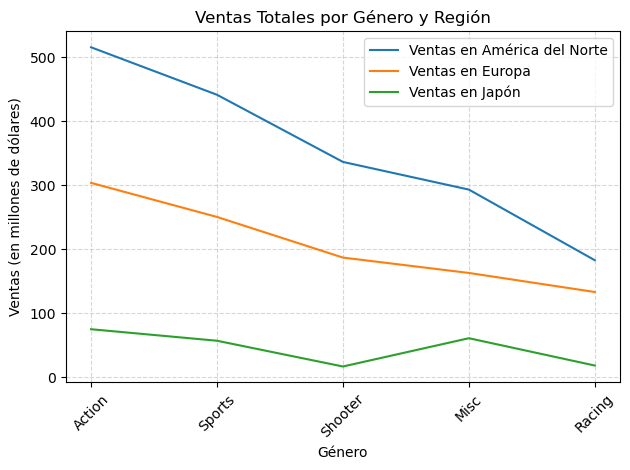

In [154]:
# Plotear las ventas por región para cada género
plt.plot(grp_genre['genre'], grp_genre['na_sales'], label='Ventas en América del Norte')
plt.plot(grp_genre['genre'], grp_genre['eu_sales'], label='Ventas en Europa')
plt.plot(grp_genre['genre'], grp_genre['jp_sales'], label='Ventas en Japón')

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Ventas (en millones de dólares)')
plt.title('Ventas Totales por Género y Región')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

In [176]:
#Ventas por clasificación ESRB y región, explica si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
#Los 5 géneros más vendidos por región

grp_esrb = df_top_platforms.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).reset_index()

rating_sales = pd.melt(grp_esrb, id_vars= ['rating'], value_vars= ['na_sales', 'eu_sales', 'jp_sales'], var_name= 'market', value_name='sales').sort_values(by='sales', ascending=False)
rating_sales

,rating,market,sales
0,E,na_sales,885.04
3,M,na_sales,542.56
5,E,eu_sales,489.92
4,T,na_sales,485.38
8,M,eu_sales,317.56
1,E10+,na_sales,265.24
9,T,eu_sales,252.48
6,E10+,eu_sales,129.03
10,E,jp_sales,127.66
14,T,jp_sales,85.86


c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='market', ylabel='sales'>

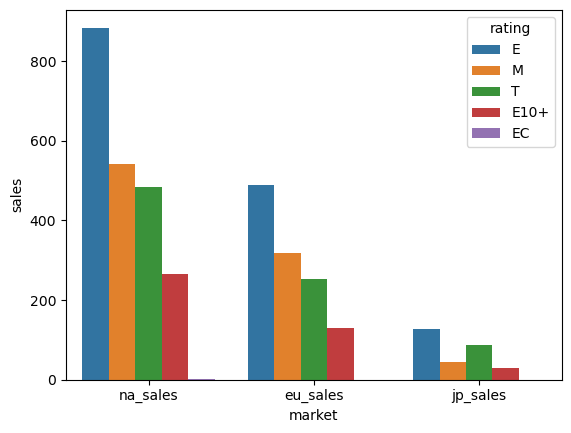

In [184]:
sns.barplot(rating_sales, x='market', y='sales', hue='rating')

### Conclusiones generales

Venta de plataformas por mercado:

- Considerando que en Europa, y Norte América abarcan más países y por lo tanto tienen una mayor población, se puede considerar que es normal que el tercer mercado el cual sólo abarca a Japón, obtenga menores ventas en cuanto a plataformas.
- La plataforma más vendida en Norte América es "X360" mientras que en Japón es la que menos ventas generó.
- La plataforma PS2 se mantuvo como una plataforma líder en los tres mercados siendo la más vendida en Europa y la segunda más vendida por poca diferencia en Norte América y Japón. 

Ventas totales por género y región:

- Los juegos de acción lideran las ventas de las tres regiones.

Ventas totales por clasificación ESBR Y región:

- La clasificación 'E' es la que más ventas generó en cada región siendo la que es apropiada para todas las edades. Por otro lado, la clasificación 'EC', no generó ventas significativas en ninguna de las tres regiones.


## Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

## Paso 6. Conclusión general

